### PROJECT(2) 와인 분류

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

#### 01 데이터 불러오기

In [4]:
wines = load_wine()
wines.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

#### 02 데이터 확인

In [5]:
df_wines = pd.DataFrame(wines.data, columns=wines.feature_names)
df_wines["label"] = wines.target

In [6]:
df_wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
df_wines.groupby("label").size()

label
0    59
1    71
2    48
dtype: int64

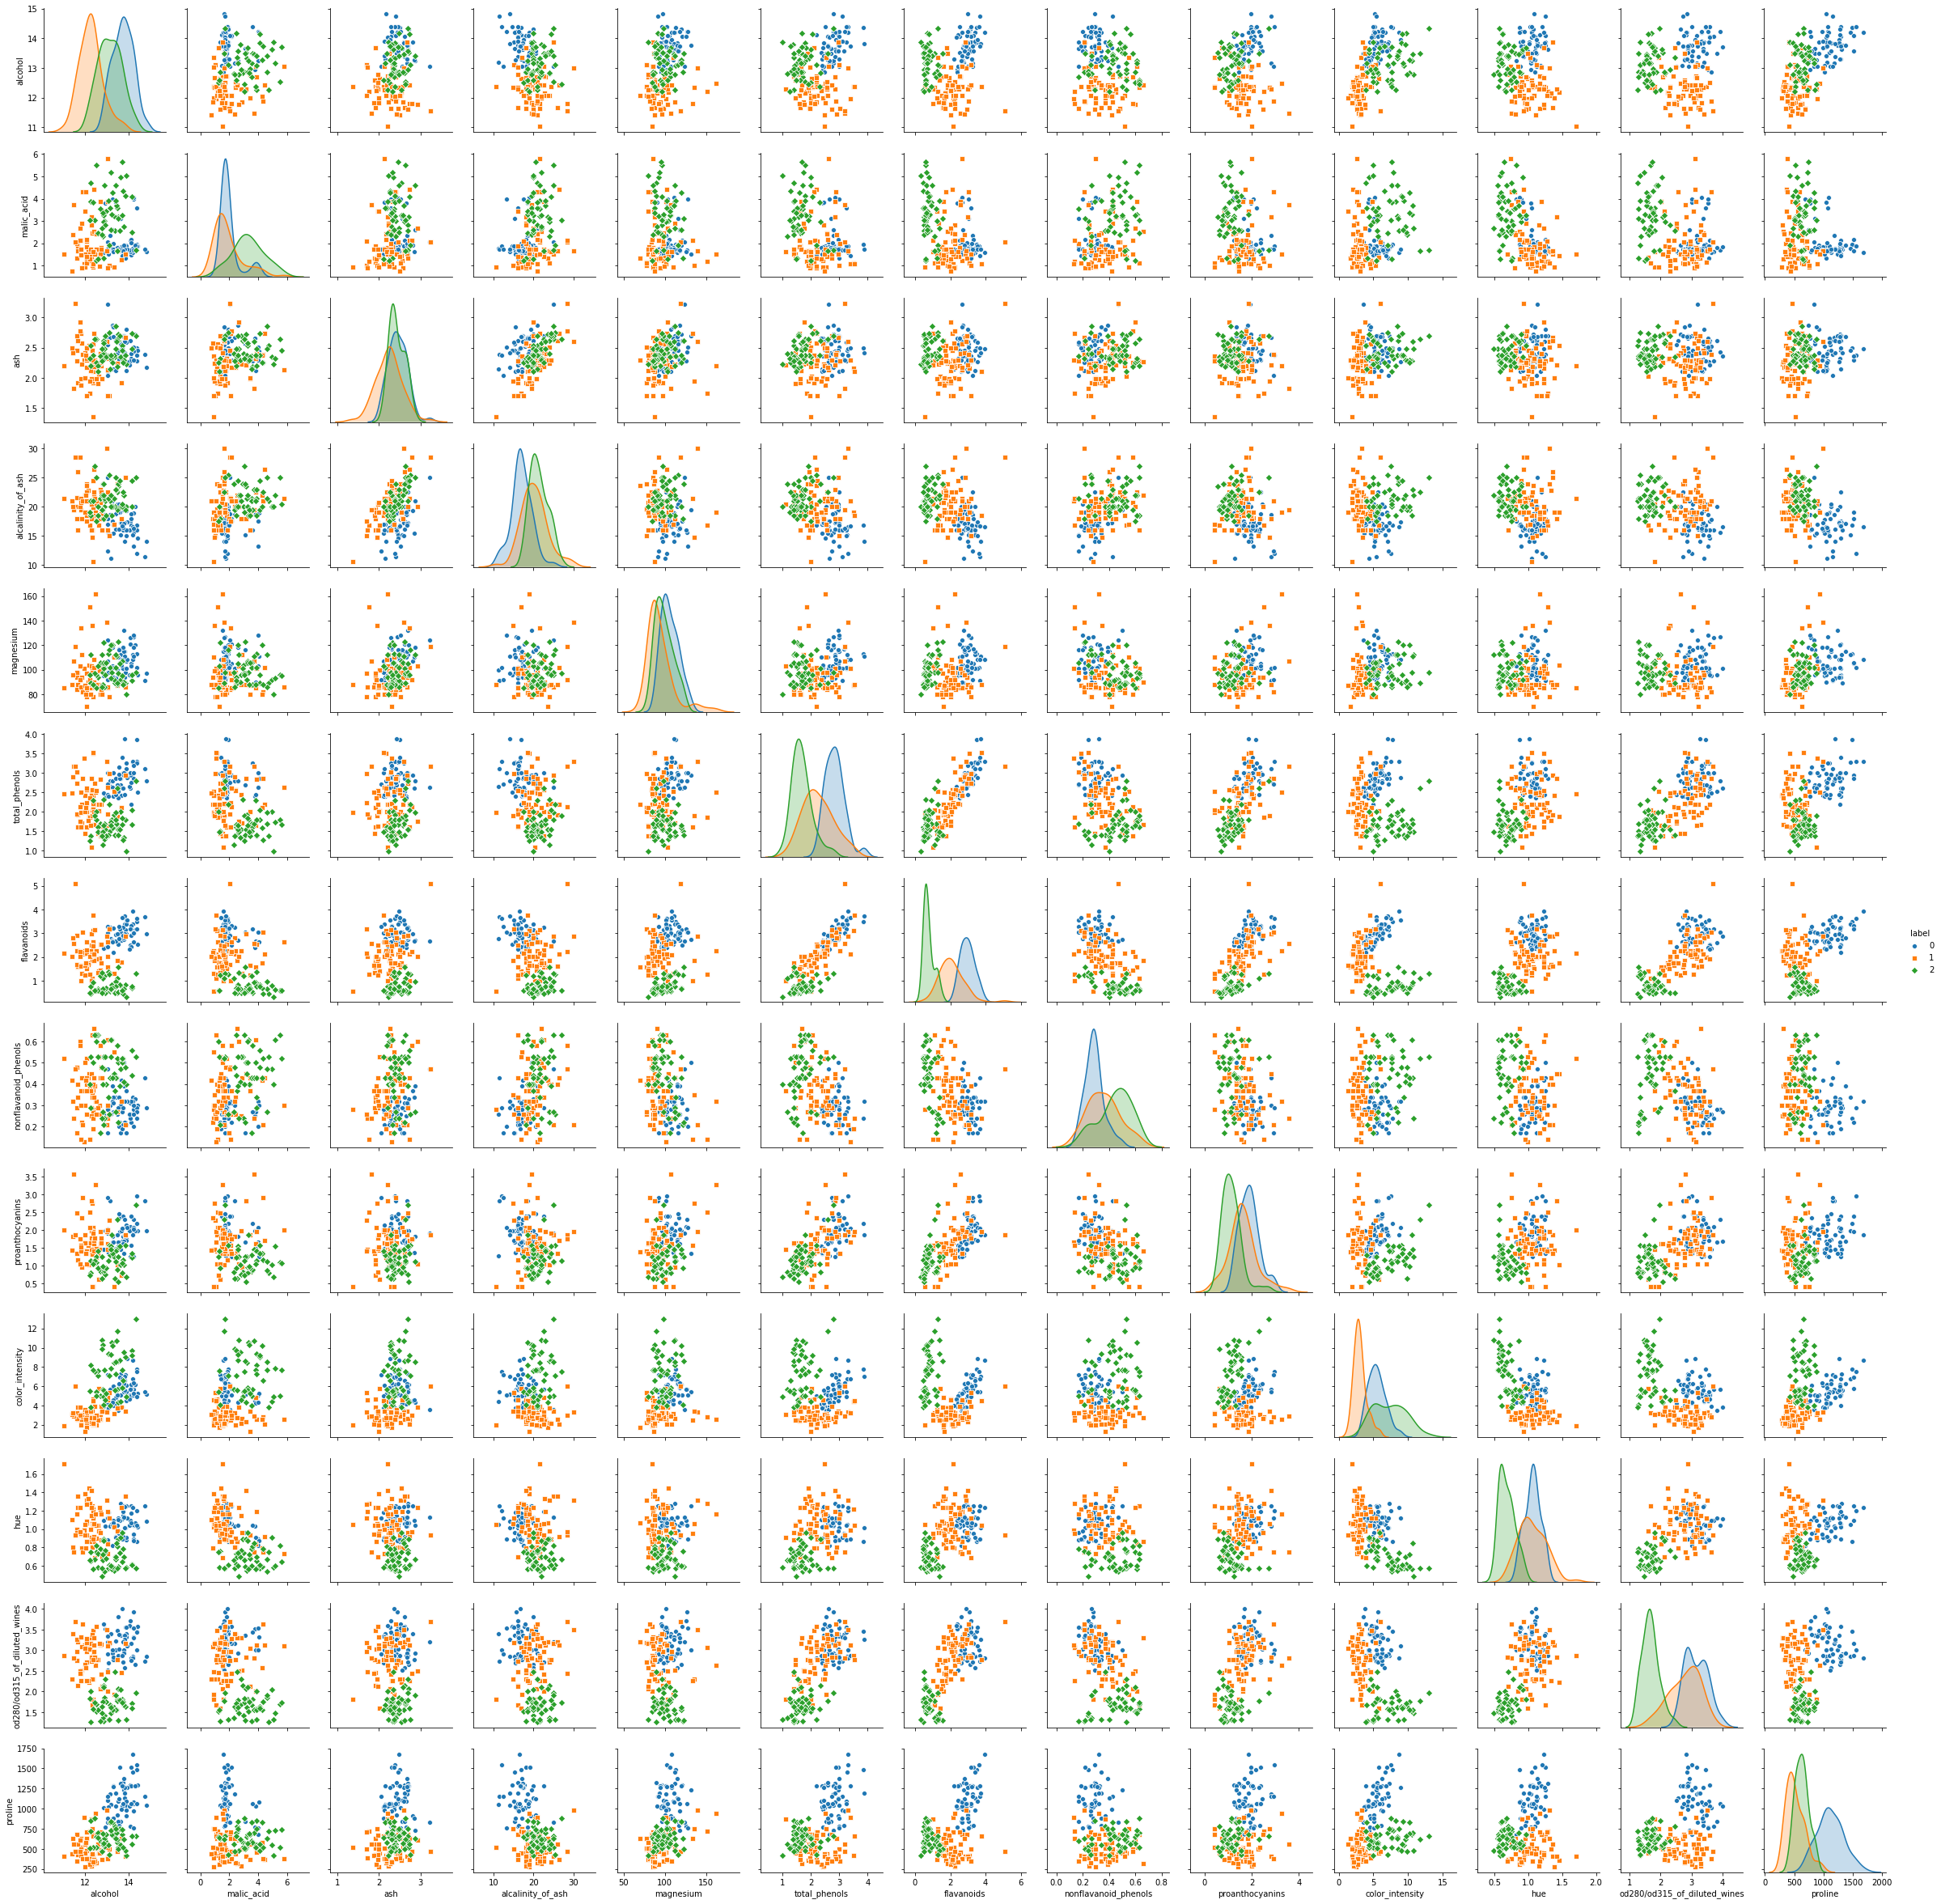

In [10]:
sns.pairplot(df_wines, hue="label", markers=["o", "s", "D"])
plt.show()

In [14]:
list(df_wines)

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline',
 'label']

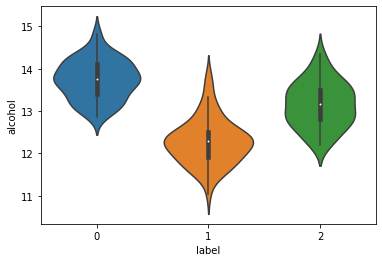

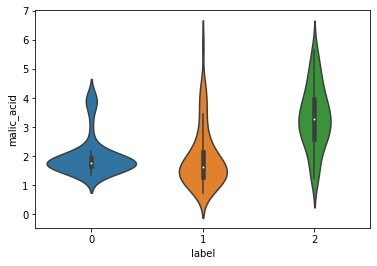

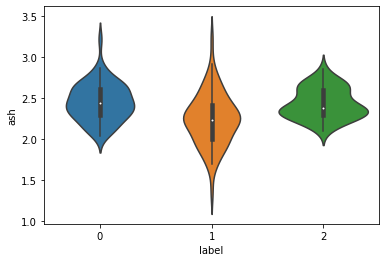

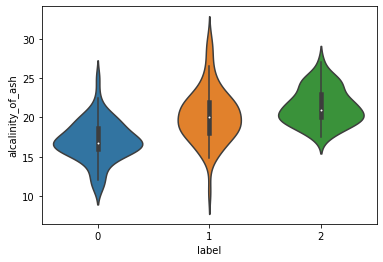

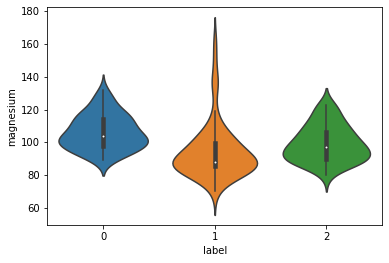

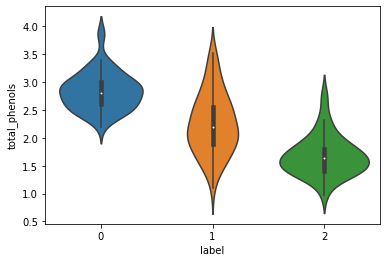

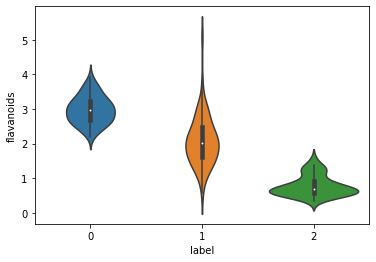

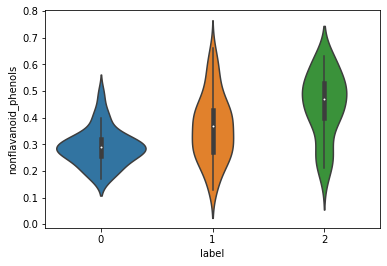

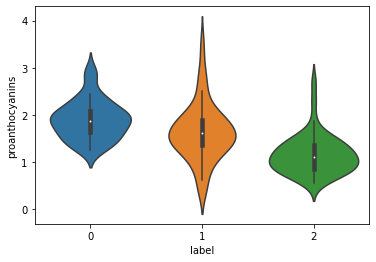

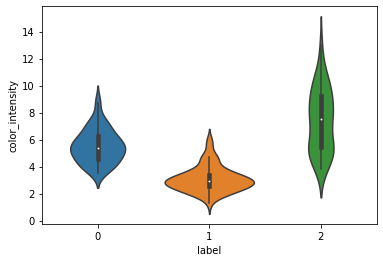

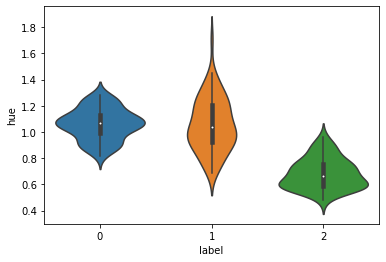

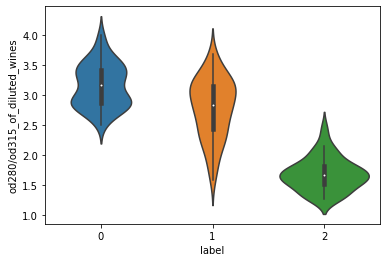

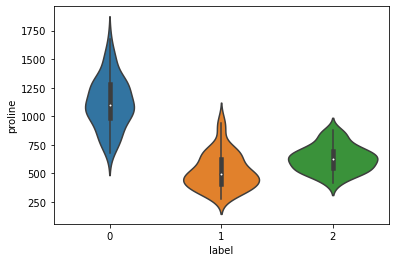

In [23]:
for idx, feature in enumerate(list(df_wines)):
    if feature != "label":
        sns.violinplot(x="label", y = feature, data = df_wines)
        
        plt.show()

위의 그래프로 확인하여 보면 클래스에 따라 분포가 많은 차이를 보이는 특징들이 존재한다. 따라서 이러한 특징을 통해 클래스를 분류하는데 도움이 될것이라 생각한다.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(wines.data, wines.target, test_size = 0.2, random_state = 45)

#### 02 Model 학습

In [26]:
models = [DecisionTreeClassifier(), RandomForestClassifier(), SVC(), SGDClassifier(), LogisticRegression()]

In [27]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Model : " + str(model))
    print(classification_report(y_test, y_pred))

Model : DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.79      0.92      0.85        12
           2       1.00      0.81      0.90        16

    accuracy                           0.89        36
   macro avg       0.89      0.91      0.89        36
weighted avg       0.90      0.89      0.89        36

Model : RandomForestClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        16

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Model : SVC()
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.46      1.00      0.63      

/home/benestump/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/benestump/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### 03 Model 평가

**Random Forest모델의 사용한 경우 100% 클래스를 구분한다. 따라서 성능적인 면에서 Random Forest가 가장 뛰어나다. 또한 와인의 클래스를 구분하는 경우에는 잘못 분류하는 경우에 큰 문제가 되지 않기 때문에 정확도를 기준으로 하는것으로도 충분할 것이라고 생각한다**